## 참고: https://hleecaster.com/ml-linear-regression-example/

## 라이브러리 설치, 호출

!pip3 install -U scikit-learn<br>
!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, ReduceLROnPlateau

## 데이터 다운로드 (특별할인 판매)

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/logistic-regression/special-sales.csv')
print(df.head())
print(df.shape)

         date weekday  busy_day  high_temperature  special_sales
0  2002-08-05     Mon         0                28              1
1  2002-08-06     Tue         0                24              0
2  2002-08-07     Wed         1                26              0
3  2002-08-08     Thu         0                24              0
4  2002-08-09     Fri         0                23              0
(21, 5)


## Input, Feature 설정

In [3]:
Label = df['special_sales']
InputFeature = df[['busy_day','high_temperature']]

## Keras Logit 모델 fitting

In [4]:
model = Sequential()
model.add(Dense(3, activation='linear', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


## Keras 모델 살펴보기

In [6]:
# Call-back 함수
# CheckPoint: Epoch 마다 validation 성능을 검증하여, best performance 일 경우 저장
# 원래는 valid로 함. 여기는 train 밖에 없어서 train으로 한 것임
CP = ModelCheckpoint(filepath='-{epoch:03d}-{loss:.4f}-{accuracy:.4f}.hdf5',
            monitor='loss', verbose=1, save_best_only=True, mode='min')

# Learning Rate 줄여나가기
LR = ReduceLROnPlateau(monitor='loss',factor=0.8,patience=3, verbose=1, min_lr=1e-8)

# factor: LR에 곱할 것.
# 0.1-> 0.08 -> 0.064.. epoch 3번 돌았을 때, loss 떨어지면 곱해라!, 1e-8보다는 LR 줄이진 말고.

CALLBACK = [CP, LR]

In [1]:
model.fit(x=InputFeature, y=Label, epochs=100, shuffle=True, batch_size=3, callbacks=CALLBACK)

NameError: name 'model' is not defined

In [9]:
model.load_weights('-095-0.5612-0.7619.hdf5')

In [10]:
model.predict(InputFeature)

array([[0.18705589],
       [0.22278705],
       [0.6303213 ],
       [0.22278705],
       [0.2324448 ],
       [0.60437256],
       [0.65553856],
       [0.2043415 ],
       [0.2134192 ],
       [0.60437256],
       [0.25262165],
       [0.24239045],
       [0.61743075],
       [0.6303213 ],
       [0.2043415 ],
       [0.25262165],
       [0.6917456 ],
       [0.19555426],
       [0.2324448 ],
       [0.67990917],
       [0.65553856]], dtype=float32)

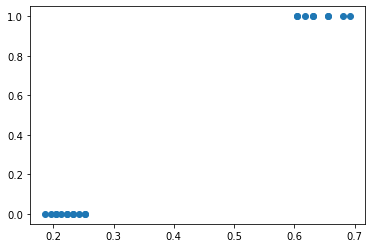

In [11]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

In [9]:
model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=0.001))
model.fit(x=InputFeature, y=Label, epochs=300, shuffle=True)

Epoch 1/300
1/1 [==============================] - 0s 219ms/step - loss: 0.5530
Epoch 2/300
1/1 [==============================] - 0s 0s/step - loss: 0.5446
Epoch 3/300
1/1 [==============================] - 0s 0s/step - loss: 0.5377
Epoch 4/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5322
Epoch 5/300
1/1 [==============================] - 0s 0s/step - loss: 0.5282
Epoch 6/300
1/1 [==============================] - 0s 0s/step - loss: 0.5256
Epoch 7/300
1/1 [==============================] - 0s 0s/step - loss: 0.5242
Epoch 8/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5238
Epoch 9/300
1/1 [==============================] - 0s 0s/step - loss: 0.5241
Epoch 10/300
1/1 [==============================] - 0s 0s/step - loss: 0.5249
Epoch 11/300
1/1 [==============================] - 0s 0s/step - loss: 0.5258
Epoch 12/300
1/1 [==============================] - 0s 16ms/step - loss: 0.5266
Epoch 13/300
1/1 [==============================] - 0s 0s/step -

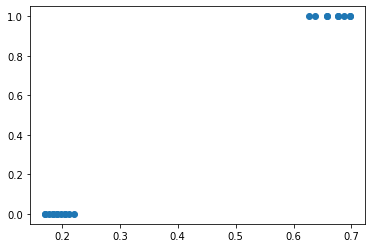

In [10]:
plt.plot(model.predict(InputFeature), df['busy_day'], 'o')
plt.show()

In [11]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score

In [12]:
print(roc_auc_score(Label, model.predict(InputFeature)))

0.8798076923076923


In [13]:
from sklearn import metrics
# ROC curve 시각화
Labels = Label
pred = model.predict(InputFeature)
fpr, tpr, _ = metrics.roc_curve(Label,  pred)

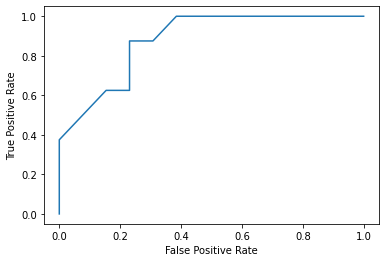

In [14]:
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()